# 11 - ANÁLISIS GRID DE BEST ESTIMATOR

## IMPORTACIÓN DE PAQUETES

In [34]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Métricas de evaluación
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Crear Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

import cloudpickle

## IMPORTAR LOS DATOS

### CARGAR LOS DATOS

In [35]:
df = pd.read_pickle('../../02_Datos/03_Trabajo/df_final.pickle')
df.head()

,peso_yeo_mms,caballos_yeo_mms,aceleracion_yeo_mms,origen_1,any_modelo_73,any_modelo_80,any_modelo_70,colt,any_modelo_79,any_modelo_82,...,subaru,gl,concord,landau,corona,any_modelo_81,504,volvo,impala,mpg
0,0.755175,0.869861,0.248895,1.0,0.0,0.0,1.0,0,0.0,0.0,...,0,0,0,0,0,0.0,0,0,0,15.0
1,0.697145,0.826943,0.281928,1.0,0.0,0.0,1.0,0,0.0,0.0,...,0,0,0,0,0,0.0,0,0,0,16.0
2,0.878469,0.944816,0.146330,1.0,0.0,0.0,1.0,0,0.0,0.0,...,0,0,0,0,0,0.0,0,0,0,15.0
3,0.880684,0.984192,0.074690,1.0,0.0,0.0,1.0,0,0.0,0.0,...,0,0,0,0,0,0.0,0,0,1,14.0
4,0.873496,0.975833,0.037754,1.0,0.0,0.0,1.0,0,0.0,0.0,...,0,0,0,0,0,0.0,0,0,0,14.0


### SEPARAR PREDICTORAS Y TARGET

In [36]:
x = df.drop(columns='mpg').copy()
y = df.mpg.copy()

In [37]:
y.head(5)

0    15.0
1    16.0
2    15.0
3    14.0
4    14.0
Name: mpg, dtype: float64

In [38]:
print(x.shape)
print(y.shape)

(279, 37)
(279,)


In [39]:
x_columns = list(x.columns)
y_target = y.name

## MODELIZAR

### RESERVAR EL DATASET DE VALIDACIÓN

In [40]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size= 0.3, random_state= 42)

### CREAR PIPE Y EL DICCIONARIO CON LOS ALGORITMOS, PARÁMETROS Y VALORES

Optimizamos los algoritmos, parámetros y valores para los mejores modelos analizados en el lazypredict

#### Parámetros a testear:

In [41]:
pipe = Pipeline([('algoritmo', RandomForestRegressor())])

grid = [   

            {
                'algoritmo': [SGDRegressor()]
            },
            {
                'algoritmo': [RidgeCV()]
            },
            {
                'algoritmo': [HistGradientBoostingRegressor()]
            },
            {
                'algoritmo': [XGBRegressor()]
            },
            {
                'algoritmo': [PoissonRegressor()]
            }
          ]

### OPTIMIZAR LOS HIPERPARÁMETROS

####  Con grid search

In [42]:
grid_search = GridSearchCV(estimator= pipe, 
                           param_grid = grid, 
                           cv = 5, 
                           scoring = 'neg_mean_absolute_percentage_error',
                           verbose = 0,
                           n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.018751,0.003419,0.004094,0.001493,RidgeCV(),{'algoritmo': RidgeCV()},-0.145637,-0.071944,-0.094721,-0.090647,-0.106447,-0.101879,0.024532,1
0,0.040913,0.005973,0.003790,0.000399,SGDRegressor(),{'algoritmo': SGDRegressor()},-0.143317,-0.092629,-0.105285,-0.105943,-0.118089,-0.113053,0.017142,2
3,0.115755,0.027383,0.004390,0.001741,"XGBRegressor(base_score=None, booster=None, ca...","{'algoritmo': XGBRegressor(base_score=None, bo...",-0.122778,-0.092130,-0.114611,-0.131352,-0.115463,-0.115267,0.013046,3
4,0.016573,0.001650,0.004035,0.000637,PoissonRegressor(),{'algoritmo': PoissonRegressor()},-0.137561,-0.086316,-0.117312,-0.123629,-0.141862,-0.121336,0.019659,4
2,0.151590,0.022292,0.006084,0.000662,HistGradientBoostingRegressor(),{'algoritmo': HistGradientBoostingRegressor()},-0.161737,-0.111932,-0.140044,-0.140145,-0.107694,-0.132310,0.020042,5


In [43]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo', RidgeCV())])

In [44]:
modelo.best_params_

{'algoritmo': RidgeCV()}

In [45]:
modelo.best_score_

-0.10187923173376405

### CREAR PICKLE DE MODELO.BEST_ESTIMATOR y PARÁMETROS

In [46]:
modelo_best_estimator = modelo

#### Guardamos modelo, parámetros y score

In [47]:
m_best_estimator = str(modelo.best_estimator_[0])
m_best_estimator = m_best_estimator.split('(')[0]
m_best_params = str(modelo.best_params_)
m_best_score = str(modelo.best_score_)

## EVALUAR

### EVALUAR SOBRE EL TRAIN

In [48]:
pred = modelo.best_estimator_.predict(train_x)
t_mape = mean_absolute_percentage_error(train_y, pred)
t_coef_determinacion = r2_score(train_y,pred)
t_mae = mean_absolute_error(train_y, pred)
t_rmse =  mean_squared_error(train_y,pred,squared='False')

print("%mape:", t_mape )
print("Coeficiente de determinación:", t_coef_determinacion)
print("MAE:", t_mae)
print("RMSE:",t_rmse)


%mape: 0.08508667990098688
Coeficiente de determinación: 0.8909745803230766
MAE: 1.9056071025554566
RMSE: 6.639929216316835


c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


### PREDECIR SOBRE LA VALIDACIÓN

In [49]:
pred = modelo.best_estimator_.predict(val_x)

c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


### EVALUAR SOBRE LA VALIDACIÓN

In [50]:
v_mape = mean_absolute_percentage_error(val_y, pred)
v_coef_determinacion = r2_score(val_y,pred)
v_mae = mean_absolute_error(val_y, pred)
v_rmse =  mean_squared_error(val_y,pred,squared='False')


print("%mape:", v_mape)
print("Coeficiente de determinación:", v_coef_determinacion)
print("MAE:", v_mae)
print("RMSE:", v_rmse)

%mape: 0.09834670268802774
Coeficiente de determinación: 0.8376492891477074
MAE: 2.1205842740868333
RMSE: 9.155776391625697


#### Gráfico entre la diferencia entre la validación y el original

In [51]:
test_y = val_y.reset_index().copy()
test_pred = pd.Series(pred).to_frame()
df_pred = pd.concat([test_y,test_pred], axis= 1).sort_values(by='mpg').reset_index()
df_pred.rename(columns = {0:'pred'}, inplace = True)
df_pred = df_pred.drop(columns= ['level_0'])
df_pred['dif'] = abs(df_pred['mpg']-df_pred['pred'])
# Diferencia entre predicción y validación
df_pred.sort_values(by = 'dif', ascending = False).head(10)

,index,mpg,pred,dif
81,271,38.0,26.902143,11.097857
47,237,23.7,32.537066,8.837066
36,258,20.2,28.453918,8.253918
83,231,43.4,35.846467,7.553533
20,259,17.6,24.967076,7.367076
32,194,19.8,25.533964,5.733964
82,244,39.0,33.828995,5.171005
76,261,34.0,28.835945,5.164055
80,213,37.3,32.273611,5.026389
73,164,33.5,28.648797,4.851203


- Quitaremos estos atípicos para mejor el modelo (index 85 y 273)

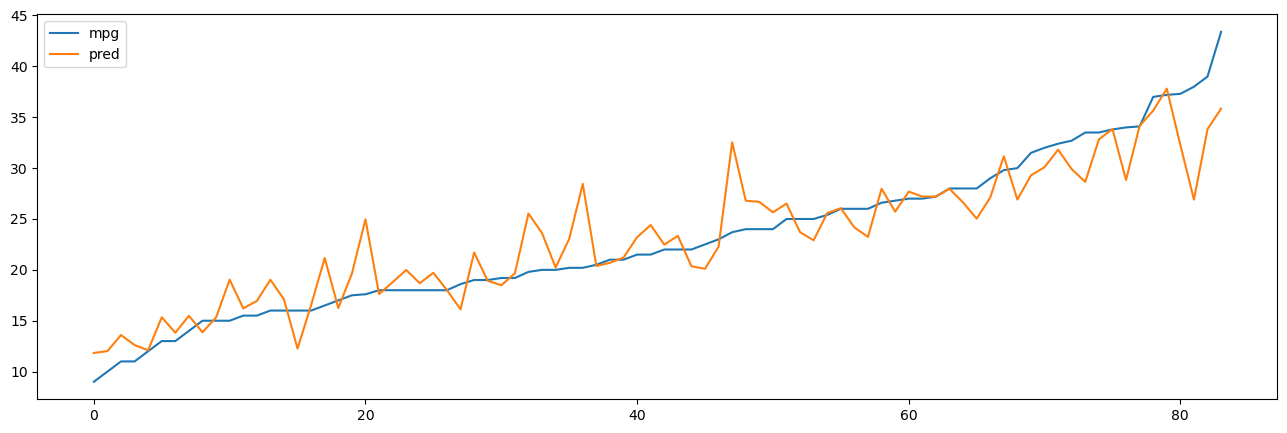

In [52]:
df_pred[['mpg','pred']].plot(figsize=(16,5));

## Gráficios de validación modelos de regresión

1. Gráfico de dispersión de valores reales vs. valores predichos: 

Este gráfico muestra los puntos de datos observados en un diagrama de dispersión, y superpone la línea de regresión que representa la relación lineal ajustada por el modelo. Puedes utilizar este gráfico para evaluar visualmente cómo se ajusta la línea de regresión a los datos observados.

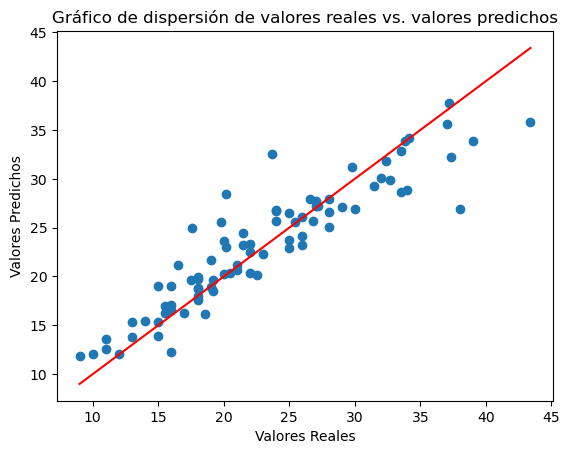

In [53]:
import matplotlib.pyplot as plt

# y = target: Valores reales
# pred - predicción: Valores predichos por el modelo

plt.scatter(val_y, pred)
plt.plot([min(val_y), max(val_y)], [min(val_y), max(val_y)], color='red')  # Línea diagonal
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Gráfico de dispersión de valores reales vs. valores predichos')
plt.show()


2. Gráfico de residuos vs. valores predichos: 


Un gráfico de residuos muestra los residuos (diferencias entre los valores observados y los valores predichos por el modelo) en función de los valores ajustados o las variables independientes. Este gráfico puede ayudarte a verificar si los residuos tienen algún patrón sistemático, como una relación no lineal o una heterocedasticidad.

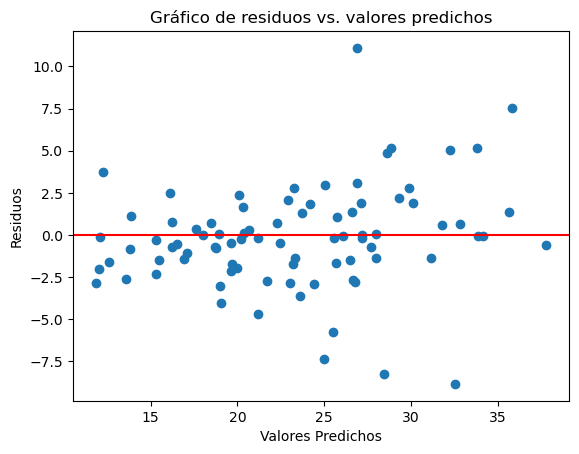

In [54]:
residuos = val_y - pred

plt.scatter(pred, residuos)
plt.axhline(y=0, color='red')  # Línea horizontal en cero
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs. valores predichos')
plt.show()


3. Histograma de residuos:

 Este gráfico muestra la distribución de los residuos del modelo. Puedes utilizar un histograma o un gráfico de densidad para visualizar cómo se distribuyen los residuos y verificar si siguen una distribución aproximadamente normal.

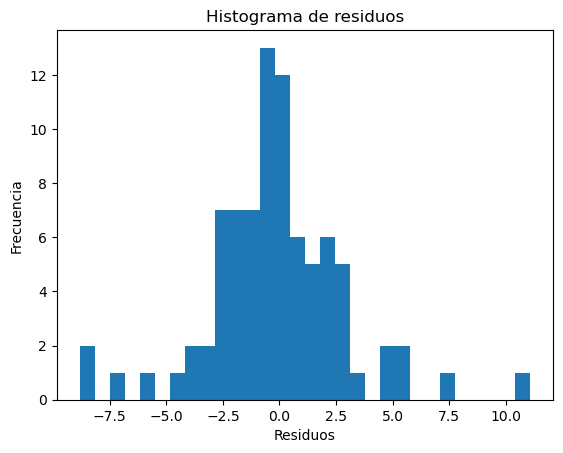

In [55]:
plt.hist(residuos, bins=30)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de residuos')
plt.show()

4. Gráfico de Q-Q (cuantil-cuantil):

Este gráfico compara los cuantiles de los residuos con los cuantiles esperados de una distribución normal. Puede ayudarte a evaluar si los residuos siguen una distribución normal.

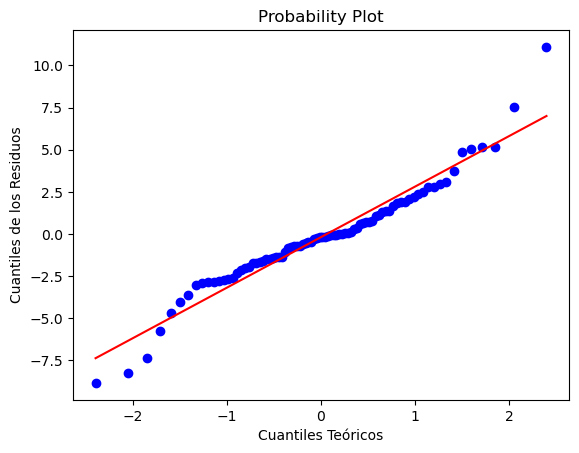

In [56]:
import scipy.stats as stats

stats.probplot(residuos, dist="norm", plot=plt)
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de los Residuos')
plt.show()


5. Gráfico de influencia:

Un gráfico de influencia muestra la influencia de cada observación en el ajuste del modelo. Puede ayudarte a identificar puntos atípicos o valores influyentes que pueden tener un impacto significativo en los resultados de la regresión.

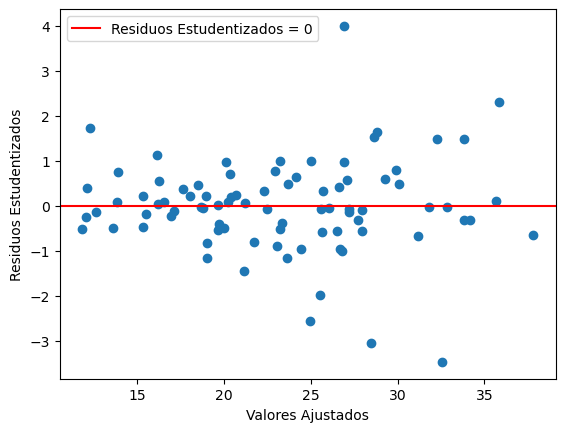

In [57]:
import statsmodels.api as sm

infl = sm.OLS(val_y, sm.add_constant(pred)).fit().get_influence()
residuos_estudentizados = infl.resid_studentized_external

plt.scatter(pred, residuos_estudentizados)
plt.axhline(y=0, color='r', linestyle='-', label='Residuos Estudentizados = 0')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos Estudentizados')
plt.legend()
plt.show()

In [58]:
# Paso 3: Definir umbral para Valores Atípicos
std_dev_threshold = 2  # Umbral en desviaciones estándar

# Paso 4: Identificación de Atípicos
outliers_indices = np.where(np.abs(residuos) > std_dev_threshold * np.std(residuos))[0]
outliers_indices

array([ 5,  8, 12, 23, 49], dtype=int64)

In [59]:
val_y.iloc[3]

20.0

# GUARDAR BEST_ESTIMATOR, PARÁMETROS Y RESULTADOS DEL TEST Y LA VALIDACIÓN

#### Guardar el mejor estimador

In [67]:
version_estimator = 'v5_'
nombre_best_estimator =  version_estimator + m_best_estimator + '.pickle'
nombre_best_estimator

'v5_RidgeCV.pickle'

In [61]:
m_best_estimator

'RidgeCV'

In [62]:
ruta_pipe_entrenamiento = '../../04_Modelos/Best_estimator/' + nombre_best_estimator

with open (ruta_pipe_entrenamiento, mode= 'wb') as file:
    cloudpickle.dump(modelo_best_estimator, file)


### Guardar la información del estimador

In [63]:
# Añadir comentarios sobre el modelo

comentarios = "Realizamos un GridSearch para ver que modelo se adapta mejor a los datos."


In [68]:
#Cargamos la lista con los resultados
resultado  = {'m_Best_estimator': m_best_estimator,
               'm_Best_paramans' : m_best_params,
               'm_Best_Score': m_best_score, 
               't_%mape': t_mape, 
               't_Coef._determinacion': t_coef_determinacion, 
               't_mae': t_mae, 
               't_rmse': t_rmse, 
               'v_%mape':  v_mape, 
               'v_Coef._determinacion': v_coef_determinacion, 
               'v_mae': v_mae, 
               'v_rmse': v_rmse,
               'comentarios': comentarios,
               'predictoras_X': x_columns,
               'target_y': y_target
            }
resultado= pd.Series(resultado,name=nombre_best_estimator)
resultado

m_Best_estimator                                                   RidgeCV
m_Best_paramans                                   {'algoritmo': RidgeCV()}
m_Best_Score                                          -0.10187923173376405
t_%mape                                                           0.085087
t_Coef._determinacion                                             0.890975
t_mae                                                             1.905607
t_rmse                                                            6.639929
v_%mape                                                           0.098347
v_Coef._determinacion                                             0.837649
v_mae                                                             2.120584
v_rmse                                                            9.155776
comentarios              Realizamos un GridSearch para ver que modelo s...
predictoras_X            [peso_yeo_mms, caballos_yeo_mms, aceleracion_y...
target_y                 

In [69]:
df_best = pd.read_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx',index_col=0)


In [70]:
df_best = pd.concat([df_best, resultado], ignore_index= False,axis=1)
df_best.to_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx')